# **LePHARE statistics**


A notebook to perform statistics on LePHARE results.

# 1. Initialisation

In [2]:
###Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
# %matplotlib widget
%matplotlib inline

###This notebook essentially uses the output catalog from zphota
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..')) #change to your lephare base_dir
CAT_OUT = os.path.join(base_dir, 'simulation_catalogs/DES/DES_STARCAT/WORK_COMPLETE2/zphota/DES_STAR.out') #output catalog directory

##Transform commented header into header for pandas dataframe
#extract header (line 47 in data file)
with open(CAT_OUT, "r") as f:
    lines = f.readlines()
    header_line = None
    for line in lines:
        if line.startswith("# IDENT  Z_BEST"): #line used for the header, always starts like this
            header_line = line
            break

#add header to column names
if header_line:
    column_names = header_line.strip("#").strip().split()

#displays data
zphota = pd.read_csv(CAT_OUT, sep='\s+', comment="#", header=None, names=column_names) #aphota dataframe
print(len(zphota))
print(list(zphota.columns.values))
zphota

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7501/2701328396.py:28: SyntaxWarning: invalid escape sequence '\s'
  zphota = pd.read_csv(CAT_OUT, sep='\s+', comment="#", header=None, names=column_names) #aphota dataframe


100000
['IDENT', 'Z_BEST', 'MOD_BEST', 'EXTLAW_BEST', 'EBV_BEST', 'SCALE_BEST', 'NBAND_USED', 'MOD_STAR', 'CHI_STAR', 'MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ZSPEC']


,IDENT,Z_BEST,MOD_BEST,EXTLAW_BEST,EBV_BEST,SCALE_BEST,NBAND_USED,MOD_STAR,CHI_STAR,MAG_OBS0,MAG_OBS1,MAG_OBS2,MAG_OBS3,MAG_OBS4,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,ZSPEC
0,33480815,0,-99,-999,-999.0,0.000000e+00,4,78,6.76875,21.495,20.914,20.767,20.685,99.000,0.012,0.012,0.012,0.013,99.000,-99.9
1,22039046,0,-99,-999,-999.0,1.000000e+09,5,76,284.45800,18.668,18.000,17.787,17.674,17.671,0.002,0.002,0.002,0.001,0.004,-99.9
2,8378877,0,-99,-999,-999.0,0.000000e+00,3,114,528.67300,19.033,17.631,16.847,16.486,16.401,0.002,0.001,0.001,0.001,0.001,-99.9
3,15023801,0,-99,-999,-999.0,-2.026100e+01,4,113,176.43600,21.911,20.480,19.734,19.400,99.000,0.013,0.004,0.004,0.004,99.000,-99.9
4,3108387,0,-99,-999,-999.0,-2.026100e+01,5,91,175.60100,19.426,18.503,18.216,18.053,18.011,0.002,0.001,0.001,0.001,0.009,-99.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11751684,0,-99,-999,-999.0,-2.026100e+01,3,115,359.91600,19.496,18.063,17.060,16.631,16.530,0.003,0.001,0.001,0.001,0.002,-99.9
99996,28125324,0,-99,-999,-999.0,-2.026100e+01,4,72,162.79500,16.476,16.101,16.005,15.972,16.002,0.001,0.001,0.001,0.001,0.001,-99.9
99997,1445731,0,-99,-999,-999.0,-2.026100e+01,4,84,14.57120,21.123,20.557,20.342,20.287,99.000,0.016,0.007,0.007,0.025,99.000,-99.9
99998,12296065,0,-99,-999,-999.0,-2.026100e+01,5,123,300.68300,22.855,21.268,19.845,19.251,19.096,0.045,0.007,0.007,0.005,0.008,-99.9


Even though most of the photometric redshifts calculated with lephare approx° match the actual redshift, the z_phot vs z_spec plot clearly shows that many of the calculated redshifts do not. In particular, we can notice error areas on the zz-plot where the lephare redshifts seem to converge. The first step is to identify the sources of error using these areas.

# Chi2 stats

First look at the fitting Chi2 computed during zphota run.

In [3]:
chi_star = zphota['CHI_STAR'] #Chi2 mask to apply when Chi2 set to error value 1e9
chi_star = chi_star[chi_star<500]

0.770554208521168 0.018346999999999995 238.7763243169582


/tmp/ipykernel_7501/2994691681.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


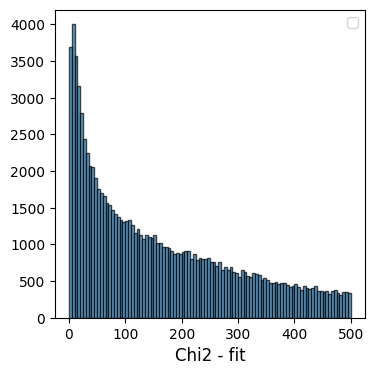

In [9]:
from scipy import stats
#Plot Chi hist
plt.figure(figsize=(4, 4))
plt.hist(chi_star, bins=100, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
x = np.linspace(0.1, max(chi_star), 200)

#Chi2
chi_star_df, chi_star_loc, chi_star_scale = stats.chi.fit(chi_star)
print(chi_star_df, chi_star_loc, chi_star_scale)
chi_star_pdf = stats.chi2.pdf(x, chi_star_df, loc=1.5, scale=chi_star_scale)
# plt.plot(x, chi_star_pdf, 'b-')

# plt.title("Chi2 distribution")
plt.xlabel('Chi2 - fit', fontsize=12)
# plt.ylim(0,0.010)
plt.legend()
plt.show()

# MOD_BEST statistics

The goal here is to seek for hypothetical "bad" SED(s) from the mag_gal library that could result into bad fitting results. For different error regions, we compute:

 - SED/redshitf grid VS error_flag and error_mag and relative badredshift/goodredshif
 - 

Text(0.5, 1.0, 'Scale_best distribution')

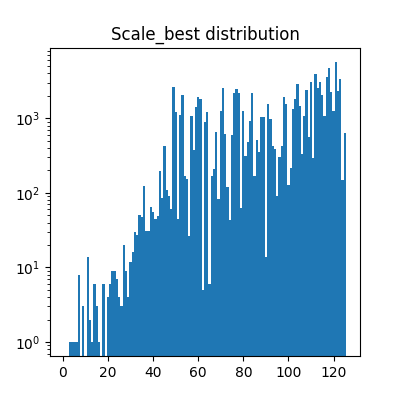

In [54]:
plt.figure(figsize=(4, 4))
# scale best hist
plt.subplot(111)
plt.hist(zphota['MOD_STAR'][zphota['CHI_STAR']<1000], range=(0.5,125.5), bins=125, log=True)
plt.title('Scale_best distribution')

# Analysis on obs_error_mag


When looking at the spectra PDF resulting from zphota (using the spec.py script in lephare_data), we notice a zbest degenerancy growing quickly with observed error magnitudes. Thus we expect these error as being the main source of computed photometric degenerancies. We'll lead a few satistic on this error to validate our hypothesis. 

In [16]:
zphota[['MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'MAG_OBS5',
 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ERR_MAG_OBS5']]

,MAG_OBS0,MAG_OBS1,MAG_OBS2,MAG_OBS3,MAG_OBS4,MAG_OBS5,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,ERR_MAG_OBS5
0,17.788,16.908,16.445,16.206,16.055,15.899,0.007,0.007,0.008,0.007,0.008,0.008
1,19.030,17.745,16.981,16.525,16.249,15.979,0.008,0.008,0.007,0.007,0.008,0.008
2,21.595,21.011,20.831,20.625,20.649,20.554,0.010,0.008,0.008,0.008,0.008,0.010
3,20.504,19.555,19.241,19.053,19.083,19.013,0.008,0.007,0.008,0.008,0.008,0.008
4,21.195,20.688,20.568,20.434,20.474,20.476,0.009,0.008,0.008,0.008,0.008,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...
111166,27.045,26.391,25.847,25.425,24.377,23.876,0.707,0.136,0.067,0.074,0.068,0.124
111167,26.171,26.540,26.245,26.109,25.725,26.297,0.472,0.138,0.096,0.158,0.237,0.549
111168,26.432,26.172,25.740,25.602,25.146,25.320,0.358,0.098,0.066,0.101,0.150,0.377
111169,28.107,27.450,26.961,26.592,25.565,25.743,1.285,0.319,0.170,0.203,0.197,0.363


35992


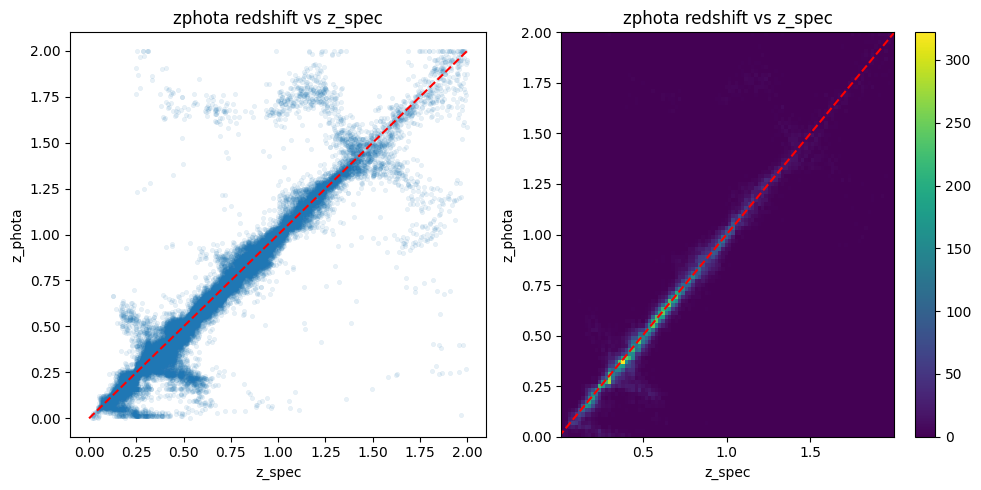

In [17]:
# redshift from output file
# mag_mask = (zphota['MAG_ABS1']<100) & (zphota['MAG_ABS1']>-100)
error_mask = (zphota['ERR_MAG_OBS2'] <= 0.05)
z_phota = zphota['Z_BEST'][error_mask]
z_spec = zphota['ZSPEC'][error_mask]
print(len(z_spec))

### z_spec vs z_phota
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(z_spec, z_phota, linewidth=0.3, s=10, alpha=0.1)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")
# plt.grid(True)

###Color map
plt.subplot(122)
plt.hist2d(z_spec, z_phota, bins=100)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")
plt.colorbar()

plt.tight_layout()
plt.show()

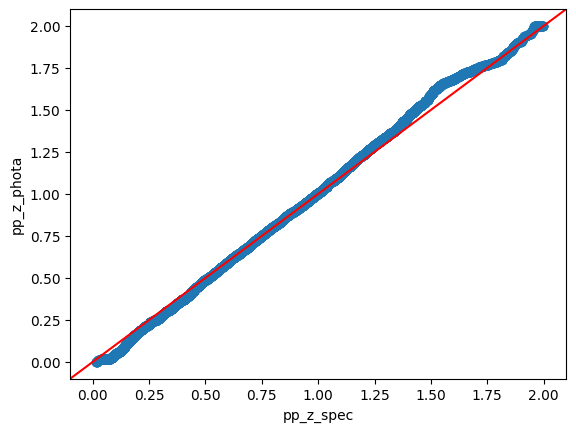

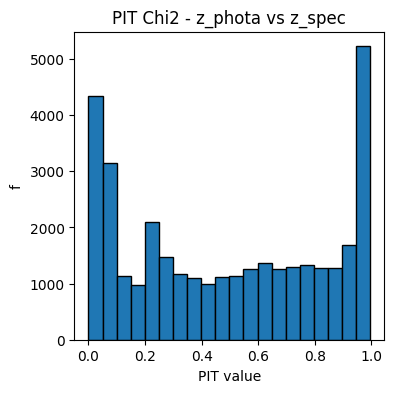

In [18]:
###qqplot and pit values

##QQ-2plot
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
pp_z_spec = sm.ProbPlot(zphota['ZSPEC'][error_mask]) #true redshift
pp_z_photo = sm.ProbPlot(zphota['Z_BEST'][error_mask]) #computed photometric redshift
qqplot_2samples(pp_z_spec, pp_z_photo,xlabel='pp_z_spec', ylabel='pp_z_phota', line="45")
plt.show()

##PIT
import scipy.stats as stats

z_spec_df, z_spec_loc, z_spec_scale = stats.chi2.fit(z_spec)

pit_values = stats.chi2.cdf(z_photo, z_spec_df, loc=z_spec_loc, scale=z_spec_scale)

plt.figure(figsize=(4, 4))
plt.hist(pit_values, bins=20, edgecolor='black')
plt.title("PIT Chi2 - z_phota vs z_spec")
plt.xlabel("PIT value")
plt.ylabel("f")
plt.show()

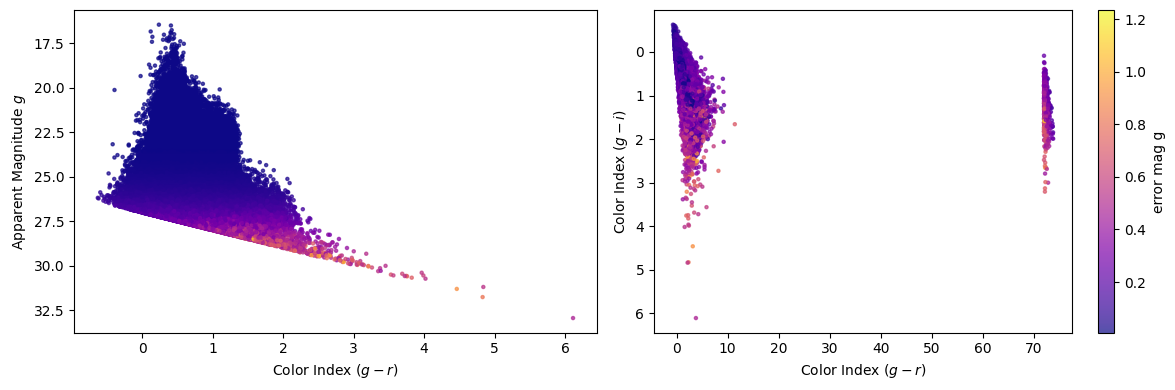

In [19]:
### plot magnitude
mag_mask = (zphota['MAG_OBS2']<50) & (zphota['MAG_OBS2']>0) & (zphota['MAG_OBS3']<50)

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(zphota['MAG_OBS2'][mag_mask]-zphota['MAG_OBS3'][mag_mask],zphota['MAG_OBS2'][mag_mask],s=5, c=zphota['ERR_MAG_OBS2'][mag_mask], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Apparent Magnitude $g$")
# plt.xlim((-5,10))
# plt.ylim((15,40))
plt.gca().invert_yaxis()

plt.subplot(122)
plt.scatter(zphota['MAG_OBS1'][mag_mask]-zphota['MAG_OBS3'][mag_mask],zphota['MAG_OBS2'][mag_mask]-zphota['MAG_OBS3'][mag_mask],s=5, c=zphota['ERR_MAG_OBS2'][mag_mask], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Color Index $(g - i)$")
# plt.xlim((-5,12))
# plt.ylim((-2.5,12))
plt.gca().invert_yaxis()


plt.colorbar(label="error mag g")
plt.tight_layout()
plt.show()

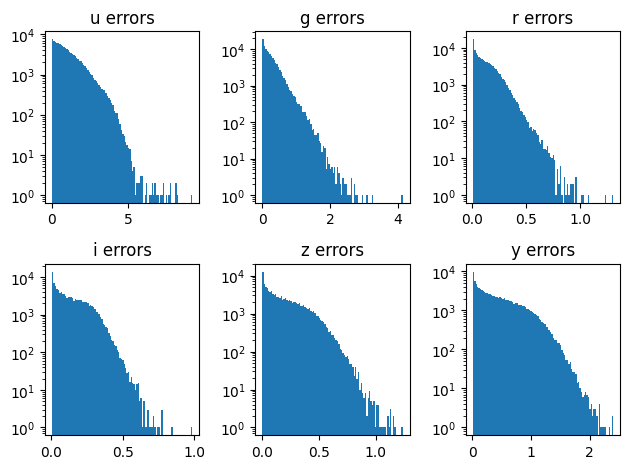

In [20]:
### Plot errors distribution for each filter
fig = plt.figure(constrained_layout=False) 

#gridspec is a way to set the dimension of a ''matrice'' of blank emplacement, to fill it later with graphics 
gs = fig.add_gridspec(2, 3) 

#plotting
MAG_OBSu = fig.add_subplot(gs[0, 0]) 
MAG_OBSu.hist(zphota['ERR_MAG_OBS0'], bins=100, log=True) 
plt.title('u errors')
MAG_OBSg = fig.add_subplot(gs[0, 1]) 
MAG_OBSg.hist(zphota['ERR_MAG_OBS1'], bins=100, log=True) 
plt.title('g errors')
MAG_OBSr = fig.add_subplot(gs[0, 2]) 
MAG_OBSr.hist(zphota['ERR_MAG_OBS2'], bins=100, log=True) 
plt.title('r errors')
MAG_OBSi = fig.add_subplot(gs[1, 0]) 
MAG_OBSi.hist(zphota['ERR_MAG_OBS3'], bins=100, log=True) 
plt.title('i errors')
MAG_OBSz = fig.add_subplot(gs[1, 1]) 
MAG_OBSz.hist(zphota['ERR_MAG_OBS4'], bins=100, log=True) 
plt.title('z errors')
MAG_OBSy = fig.add_subplot(gs[1, 2]) 
MAG_OBSy.hist(zphota['ERR_MAG_OBS5'], bins=100, log=True) 
plt.title('y errors')
plt.tight_layout()


# Error regions

Many error regions are distinguishable on the zz-plot. We'll use earlier showed statistics technics to try to rely these area to particular input data error modes.

**0-row**

In [21]:
###Create chi outlier list
chi_outliers = zphota[zphota['CHI_BEST'] >= 1e9]
#if CHI = 1e9, Z_BEST = 0
chi_outliers
#but x Z_BEST = 0 do not involves CHI_BEST=1e9

,IDENT,Z_BEST,Z_BEST68_LOW,Z_BEST68_HIGH,Z_BEST99_LOW,Z_BEST99_HIGH,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,...,MAG_ABS4,MAG_ABS5,EMAG_ABS0,EMAG_ABS1,EMAG_ABS2,EMAG_ABS3,EMAG_ABS4,EMAG_ABS5,ZSPEC,PDZ_FLAG
3049,11495.0,0.0,0.0,2.0,0.0,2.0,-99.9,0.0,1.000000e+09,-99,...,-999.00000,-999.00000,-1.00000,-1.0,0.0,-1.0,-1.0,-1.0,0.40491,0
3492,13152.0,0.0,0.0,2.0,0.0,2.0,-99.9,0.0,1.000000e+09,-99,...,-999.00000,-999.00000,-1.00000,-1.0,0.0,0.0,-1.0,-1.0,0.42104,0
3662,13785.0,0.0,0.0,2.0,0.0,2.0,-99.9,0.0,1.000000e+09,-99,...,-999.00000,-999.00000,1.44979,0.0,0.0,0.0,-1.0,-1.0,0.43447,0
3856,14530.0,0.0,0.0,2.0,0.0,2.0,-99.9,0.0,1.000000e+09,-99,...,-999.00000,-999.00000,-1.00000,-1.0,0.0,-1.0,-1.0,-1.0,0.43522,0
3897,14693.0,0.0,0.0,2.0,0.0,2.0,-99.9,0.0,1.000000e+09,-99,...,1024.99194,-999.00000,-1.00000,-1.0,0.0,0.0,0.0,-1.0,0.43340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109912,414874.0,0.0,0.0,2.0,0.0,2.0,-99.9,0.0,1.000000e+09,-99,...,1024.75674,-999.00000,-1.00000,-1.0,-1.0,-1.0,0.0,-1.0,1.68314,0
110048,415412.0,0.0,0.0,2.0,0.0,2.0,-99.9,0.0,1.000000e+09,-99,...,1024.05274,1023.48661,-1.00000,-1.0,-1.0,0.0,0.0,0.0,1.69759,0
110154,415847.0,0.0,0.0,2.0,0.0,2.0,-99.9,0.0,1.000000e+09,-99,...,1023.83744,1023.08851,-1.00000,-1.0,-1.0,0.0,0.0,0.0,1.76015,0
110166,415885.0,0.0,0.0,2.0,0.0,2.0,-99.9,0.0,1.000000e+09,-99,...,1024.28534,1023.66711,-1.00000,-1.0,-1.0,0.0,0.0,0.0,1.74296,0


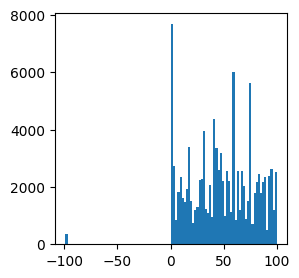

In [22]:
plt.figure(figsize=(3,3))
plt.hist(zphota['MOD_BEST'], bins=100)
plt.show()

In [23]:
plt.figure()
plt.hist(chi_outliers['NBAND_USED'])
plt.show()

KeyError: 'NBAND_USED'

<Figure size 640x480 with 0 Axes>

We see that when zhopta does not find a SED for a fit, it returns mod_best = -99 and chi_best =1e9. We identify catalog sources resulting in this error, but it is not enough : only 354/111171 sources are excluded, when ~30% of photometric redshifts do not match with the true redshifts from the training file.

**0 to 0.33 rows**

On fig.1, we see several asymptotes from 0 to ~0.33 (excluding the one = 0). Second step is to identify what parameter in OUTPUT_CAT allows to isolate those values. In **Scale_best statistics**, we notices that this parameter is a good way to exclude specific area of the zz-plot without affecting the others. 

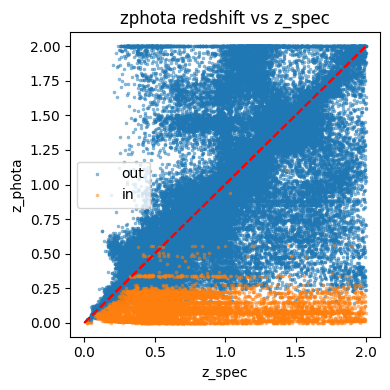

In [24]:
###Check scale outliers reduced zphota vs zspec
### z_spec vs z_phota

plt.figure(figsize=(4, 4))
##Out error region
mask_out = zphota['SCALE_BEST']>5e-4
z_phota_out = zphota['Z_BEST'][mask_out]
z_spec_out = zphota['ZSPEC'][mask_out]
plt.scatter(z_spec_out, z_phota_out, linewidth=0.3, s=5, alpha=0.5, label='out')
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")

##In error region
mask_in = zphota['SCALE_BEST']<5e-4
z_phota_in = zphota['Z_BEST'][mask_in]
z_spec_in = zphota['ZSPEC'][mask_in]
plt.scatter(z_spec_in, z_phota_in, linewidth=0.3, s=5, alpha=0.5,label='in')
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")

plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

**2-row**

Identifying error source(s) resulting into these photometric redshifts topping at 2

In [26]:
z_photo2 = zphota[zphota['Z_BEST'] == 2]
z_photo2

,IDENT,Z_BEST,Z_BEST68_LOW,Z_BEST68_HIGH,Z_BEST99_LOW,Z_BEST99_HIGH,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,...,MAG_ABS4,MAG_ABS5,EMAG_ABS0,EMAG_ABS1,EMAG_ABS2,EMAG_ABS3,EMAG_ABS4,EMAG_ABS5,ZSPEC,PDZ_FLAG
1268,4476.0,2.0,0.0100,2.0,0.01,2.0,0.6729,0.0148,0.206932,38,...,-21.59098,-21.80674,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.0000,0.26043,26
1279,4527.0,2.0,0.2456,2.0,0.01,2.0,0.4869,0.0147,0.566184,38,...,-21.93580,-22.15156,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.0000,0.26206,26
1906,7101.0,2.0,0.0100,2.0,0.01,2.0,0.5215,0.0149,0.622483,56,...,-21.08525,-21.21187,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.0000,0.31642,26
1933,7228.0,2.0,0.0100,2.0,0.01,2.0,0.5715,0.3573,1.295620,41,...,-21.25042,-21.37902,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.0000,0.34822,26
2103,7864.0,2.0,0.0100,2.0,0.01,2.0,0.8607,0.0149,0.082469,38,...,-21.27835,-21.49411,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.0000,0.34681,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110912,418676.0,2.0,0.0964,2.0,0.01,2.0,0.7083,0.4084,0.411742,32,...,-21.67079,-21.82544,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.0000,1.96149,26
110915,418682.0,2.0,1.1057,2.0,0.01,2.0,1.2729,1.1882,0.401681,25,...,-22.63243,-22.82308,0.65712,2.10691,2.98457,3.61152,3.94407,4.1758,1.98719,3
110924,418708.0,2.0,1.9009,2.0,0.01,2.0,0.3739,2.0000,0.543379,56,...,-21.59186,-21.71849,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.0000,1.97790,16
110927,418723.0,2.0,0.0100,2.0,0.01,2.0,1.4110,0.0144,1.037350,19,...,-22.32542,-22.60888,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.0000,1.97155,30


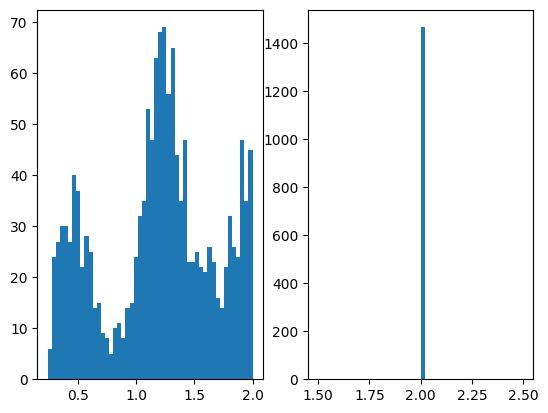

In [27]:
plt.figure()
plt.subplot(121)
plt.hist(z_photo2['ZSPEC'], bins=50)

plt.subplot(122)
plt.hist(z_photo2['Z_BEST'], bins=50)
plt.show()

In [28]:
z_photo2.to_csv('temp.csv', index=False)

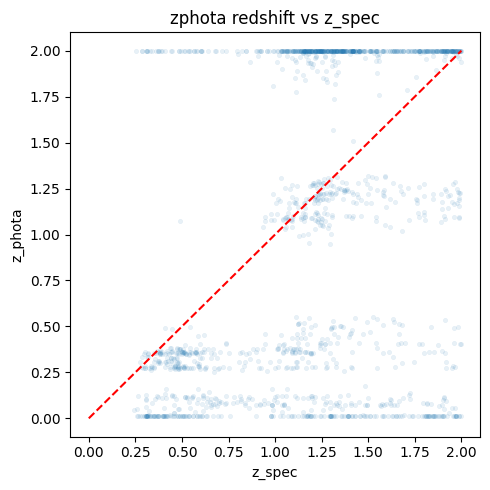

In [29]:
### z_spec vs z_phota
plt.figure(figsize=(5, 5))
plt.scatter(z_photo2['ZSPEC'], z_photo2['Z_MODE'], linewidth=0.3, s=10, alpha=0.1)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")
# plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

**1.75 square region**

A noticable error region is at (z_spec, z_best) = (1.15,1.75), where outlier values are contained within a square with sides of 0.4. 

In [30]:
# ### Test
# base_dir = '/home/hallouin/Documents/thall_2025/lephare/'
# CAT_OUT_175 = os.path.join(base_dir, 'docs/zphota_training/TRAINING_CAT_zbest175_noadapt.out')

# #extract header (line 47 in data file)
# with open(CAT_OUT_175, "r") as f:
#     lines = f.readlines()
#     header_line = None
#     for line in lines:
#         if line.startswith("# IDENT  Z_BEST"):
#             header_line = line
#             break

# #add header to column names
# if header_line:
#     column_names = header_line.strip("#").strip().split()

# #read data
# zphota175_bis = pd.read_csv(CAT_OUT_175, sep='\s+', comment="#", header=None, names=column_names)
# zphota175_bis

2504


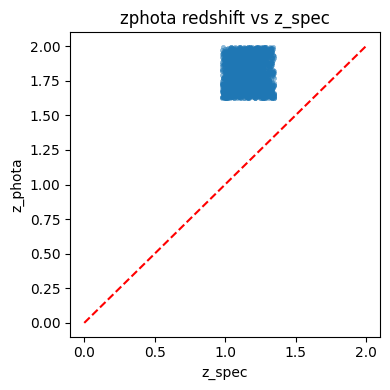

In [31]:
mask_in = (((zphota['ZSPEC'] > 0.978) & (zphota['ZSPEC'] < 1.35))
        & ((zphota['Z_BEST'] > 1.623) & (zphota['Z_BEST'] < 2)))
# mask_out = (((zphota['ZSPEC'] < 0.978) | (zphota['ZSPEC'] > 1.35))
#         | ((zphota['Z_BEST'] < 1.623) | (zphota['Z_BEST'] > 2)))
zphota175 = zphota[mask_in]
print(len(zphota175))

### z_spec vs z_phota
plt.figure(figsize=(4, 4))
plt.scatter(zphota175['ZSPEC'], zphota175['Z_BEST'], linewidth=0.3, s=10, alpha=0.5)
# plt.scatter(zphota175_bis['ZSPEC'], zphota175_bis['Z_BEST'], linewidth=0.3, s=10, alpha=0.5)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")
# plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'mod distribution')

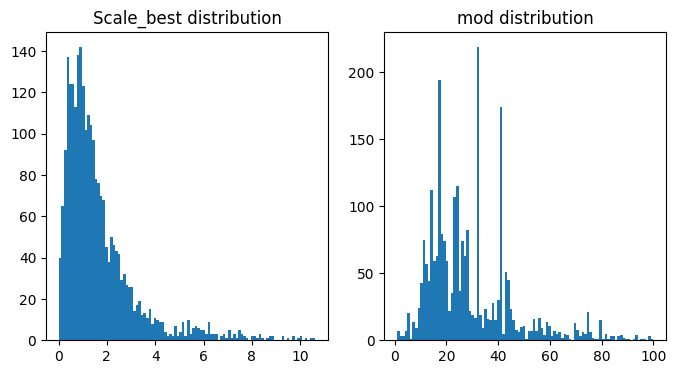

In [32]:
plt.figure(figsize=(8, 4))
# scale best hist
plt.subplot(121)
plt.hist(zphota175['SCALE_BEST'], bins=100)
plt.title('Scale_best distribution')

#zspec hist for pecular scale_best
plt.subplot(122)
plt.hist(zphota175['MOD_BEST'], bins=100)
plt.title('mod distribution')

# One mask to rule them all

For our dataset, we present our best mask using the data analysis gathered before

79676


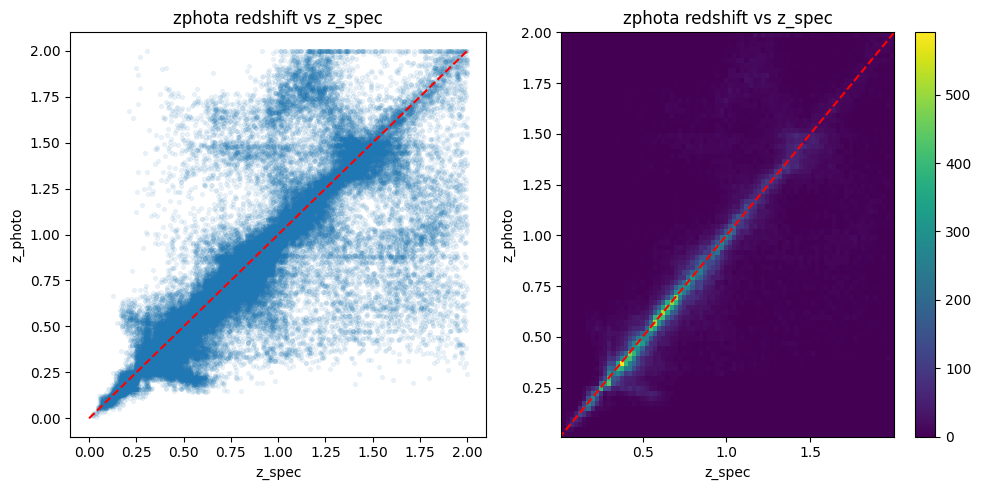

In [38]:
### Applying masks by cathegory
##from observed data
#magnitudes errors
emag_mask = (zphota['ERR_MAG_OBS1'] <= 0.5)

##from output catalog
#best_scales outliers
bestscale_mask = zphota['SCALE_BEST']>1e-3
#Chi2 outliers
chi2_mask = zphota['CHI_BEST']<100

##from pdz analysis
flag_mask = zphota['PDZ_FLAG']<=15

the_mask = emag_mask & bestscale_mask & chi2_mask & flag_mask  #np.logical_not()

# redshift from output file
z_photo = zphota['Z_BEST'][the_mask]
z_spec = zphota['ZSPEC'][the_mask]
print(len(z_spec))

### z_spec vs z_phota
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(z_spec, z_photo, linewidth=0.3, s=10, alpha=0.1)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_photo")
plt.title("zphota redshift vs z_spec")
# plt.grid(True)

###Color map
plt.subplot(122)
plt.hist2d(z_spec, z_photo, bins=80, cmap='viridis')
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_photo")
plt.title("zphota redshift vs z_spec")
plt.colorbar()

plt.tight_layout()
plt.show()

# Saving a particular data set from CAT.out

In [ ]:
def masking_input_cat(masked_output_df, original_input_path, new_input_path):
    """
    Filters the INPUT.dat file using the IDENT values from a masked LePhare output DataFrame
    and writes the result to a new file.

    Parameters:
    - masked_output_df: pandas DataFrame with a column named 'IDENT'
    - original_input_path: str, path to the original INPUT.dat file
    - new_input_path: str, path where the filtered INPUT.dat will be saved
    """
    # Load original input file
    input_data = []
    with open(original_input_path, "r") as f:
        for line in f:
            input_data.append(line.strip())

    # Extract IDENTs from masked output
    idents_to_keep = set(masked_output_df["IDENT"].astype(float))
    ident_list=[]
    # Write new input file with only the matching IDENTs
    with open(new_input_path, "w") as f:
        for line in input_data:
            ident = float(line.split()[0])
            if ident in idents_to_keep:
                f.write(line + "\n")
    print(f"Filtered input written to: {new_input_path}")


In [ ]:
# Filter input file based on masked output
INPUT_CAT = '/home/hallouin/Documents/thall_2025/lephare/simulation_catalogs/buzzard_base/Final_Buzzard_training_file.dat'
filtered_INPUT_CAT = '/home/hallouin/Documents/thall_2025/lephare/simulation_catalogs/buzzard_base/zbest175_Buzzard_training_file.dat'
masking_input_cat(zphota175, INPUT_CAT, filtered_INPUT_CAT)
